In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

# Import the dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

761

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
print("Yes")

Yes


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp"]
        city_min_temp = city_weather["main"]["temp_min"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        weather_main = city_weather["weather"][0]["main"]
        weather_description = city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Temp": city_temp,
                          "Min Temp": city_min_temp,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": weather_main,
                          "Current Details": weather_description,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | qaqortoq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | albany
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | vaini
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | punta arenas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | bluff
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Temp,Min Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Current Details,Country,Date
0,Qaqortoq,60.7167,-46.0333,21.20,21.20,21.20,58,75,4.61,Clouds,broken clouds,GL,2021-03-11 10:22:19
1,Albany,42.6001,-73.9662,39.31,36.00,42.80,87,90,12.66,Clouds,overcast clouds,US,2021-03-11 10:20:39
2,Vaini,-21.2000,-175.2000,77.00,77.00,77.00,73,40,5.75,Rain,light rain,TO,2021-03-11 10:22:19
3,Punta Arenas,-53.1500,-70.9167,41.00,41.00,41.00,75,40,20.71,Rain,light rain,CL,2021-03-11 10:19:47
4,Bluff,-46.6000,168.3333,48.99,48.99,48.99,78,0,6.11,Clear,clear sky,NZ,2021-03-11 10:22:20
5,Leh,34.1667,77.5833,33.31,33.31,33.31,28,93,5.03,Clouds,overcast clouds,IN,2021-03-11 10:22:20
6,Canton,23.1167,113.2500,79.45,77.00,82.00,61,75,2.24,Clouds,broken clouds,CN,2021-03-11 10:18:44
7,La Tuque,47.4334,-72.7824,41.00,41.00,41.00,60,100,5.75,Clouds,overcast clouds,CA,2021-03-11 10:22:21
8,Upernavik,72.7868,-56.1549,6.48,6.48,6.48,85,100,3.18,Clouds,overcast clouds,GL,2021-03-11 10:22:21
9,Norman Wells,65.2820,-126.8329,14.00,14.00,14.00,67,75,4.61,Clouds,broken clouds,CA,2021-03-11 10:22:22


In [11]:
updated_column_order = ["City","Country","Date","Lat","Lng","Temp","Min Temp","Max Temp","Current Description", "Current Details", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[updated_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Temp,Min Temp,Max Temp,Current Description,Current Details,Humidity,Cloudiness,Wind Speed
0,Qaqortoq,GL,2021-03-11 10:22:19,60.7167,-46.0333,21.20,21.20,21.20,Clouds,broken clouds,58,75,4.61
1,Albany,US,2021-03-11 10:20:39,42.6001,-73.9662,39.31,36.00,42.80,Clouds,overcast clouds,87,90,12.66
2,Vaini,TO,2021-03-11 10:22:19,-21.2000,-175.2000,77.00,77.00,77.00,Rain,light rain,73,40,5.75
3,Punta Arenas,CL,2021-03-11 10:19:47,-53.1500,-70.9167,41.00,41.00,41.00,Rain,light rain,75,40,20.71
4,Bluff,NZ,2021-03-11 10:22:20,-46.6000,168.3333,48.99,48.99,48.99,Clear,clear sky,78,0,6.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Aguada De Pasajeros,CU,2021-03-11 10:26:03,22.3850,-80.8508,66.20,66.20,66.20,Rain,moderate rain,88,0,6.91
700,Marsa Matruh,EG,2021-03-11 10:26:04,31.3525,27.2453,66.20,66.20,66.20,Clouds,broken clouds,63,75,18.41
701,Half Moon Bay,US,2021-03-11 10:26:04,37.4636,-122.4286,41.95,39.99,44.60,Clouds,scattered clouds,87,40,5.75
702,Poyarkovo,RU,2021-03-11 10:26:04,49.6000,128.6833,21.18,21.18,21.18,Clouds,few clouds,91,16,1.72


In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

from datetime import date
today_date = date.today()
# Month abbreviation, day and year	
folder_date = today_date.strftime("%b-%d-%Y")

In [13]:
# Create the output file (CSV).
output_data_file = f"../data/weather_data/{folder_date}-cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

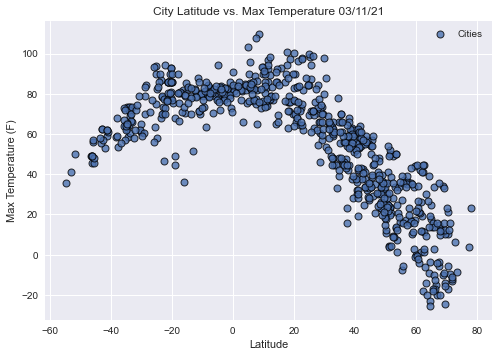

In [15]:
# Build the scatter plot for latitude vs. max temperature.
# Defined style for plot
plt.style.use("seaborn")
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("../resources/{folder_date}-lat-vs-max-temp.png")
# Show plot.
plt.show()

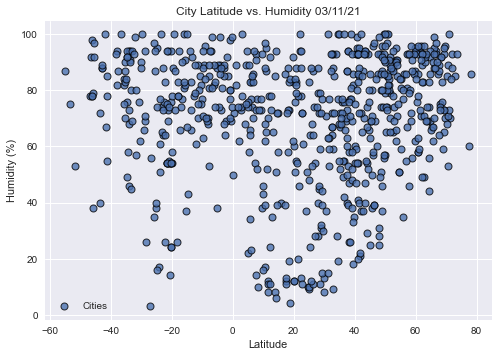

In [16]:
# Build the scatter plots for latitude vs. humidity.
# Defined style for plot
plt.style.use("seaborn")
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("../resources/{folder_date}-lat-vs-humidity.png")
# Show plot.
plt.show()

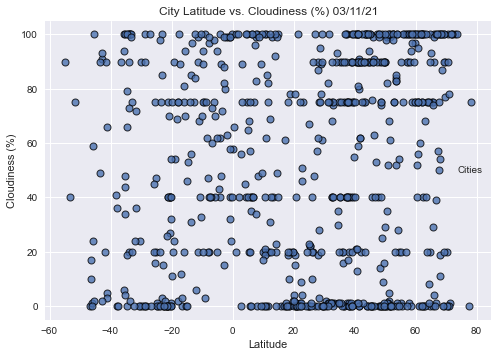

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
# Defined style for plot
plt.style.use("seaborn")
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("../resources/{folder_date}-lat-vs-clousiness.png")
# Show plot.
plt.show()

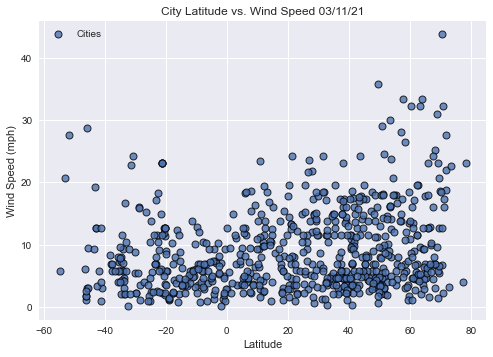

In [18]:
# Build the scatter plots for latitude vs. wind speed.
# Defined style for plot
plt.style.use("seaborn")
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.legend()
# Save the figure.
plt.savefig("../resources/{folder_date}-lat-vs-wind-speed.png")
# Show plot.
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Defined style for plot
    plt.style.use("seaborn")
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

No handles with labels found to put in legend.


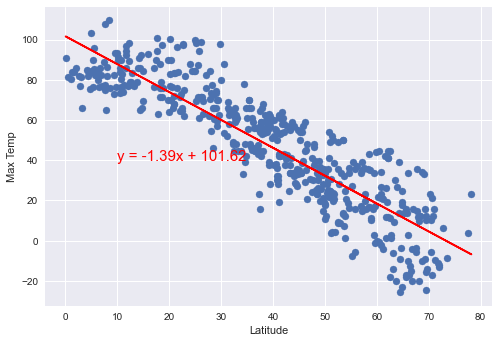

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

No handles with labels found to put in legend.


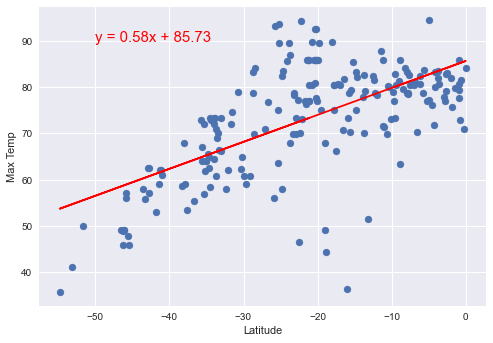

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50,90))

No handles with labels found to put in legend.


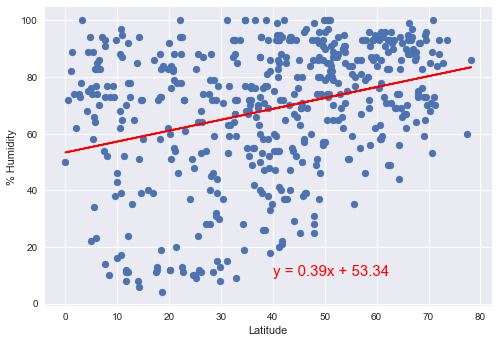

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (40,10))

No handles with labels found to put in legend.


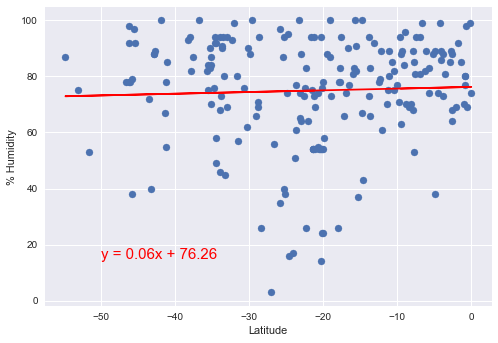

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50,15))

No handles with labels found to put in legend.


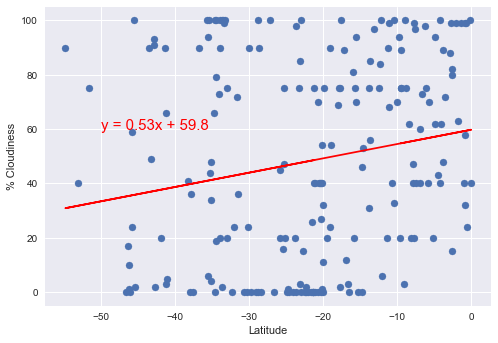

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

No handles with labels found to put in legend.


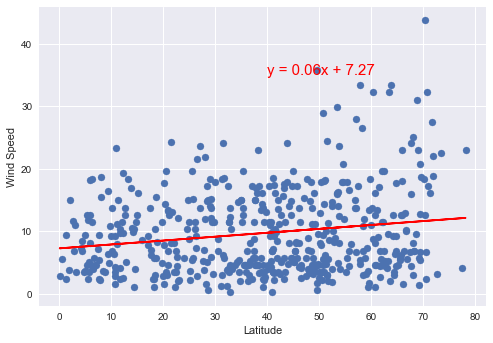

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (40,35))

No handles with labels found to put in legend.


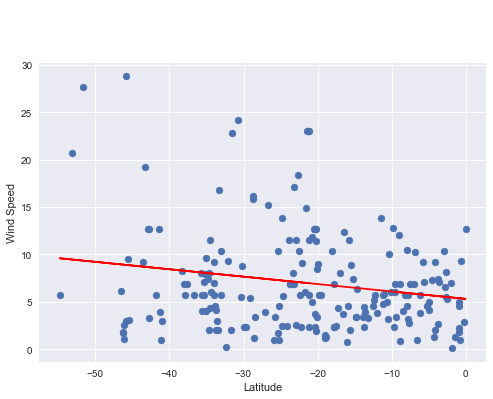

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-50,35))